In [3]:
from urllib.request import urlretrieve
from urllib.request import urlopen
from urllib.parse import quote_plus
from bs4 import BeautifulSoup

baseUrl = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
plusUrl = input('검색어 입력')
url = baseUrl + quote_plus(plusUrl)

html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')
img = soup.find_all(class_='img._image _listImage')

path = './data/eyes/'
n = 1
name = 'open_eyes'

for i in img:
    imgUrl = i['data-source']
    with urlopen(imgUrl) as f:
        with open(path + str(name)+str(n)+'.jpg','wb') as h:
            img=f.read()
            h.write(img)
        n+=1
    print('다운완료')


검색어 입력연예인사진


In [11]:
import os
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import urllib
import pandas as pd
from urllib.request import urlretrieve
from urllib.request import urlopen
options = webdriver.ChromeOptions()
options.add_argument('headless')

browser = webdriver.Chrome("C:\chromedriver.exe")
url = "https://search.naver.com/search.naver?where=image&sm=tab_jum&query=%EC%97%B0%EC%98%88%EC%9D%B8+%EC%82%AC%EC%A7%84"
browser.maximize_window()
browser.get(url)
bs = BeautifulSoup(browser.page_source, 'lxml')

C:\Users\yeop\AppData\Local\Temp\ipykernel_29820\2744757390.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome("C:\chromedriver.exe")


<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/100.0.4896.127 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="연예인 사진 : 네이버 이미지검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'연예인 사진'의 네이버 이미지검색 결과입니다." property="og:description"/> <meta content="'연예인 사진'의 네이버 이미지검색 결과입니다." lang="ko" name="description"/> <title>연예인 사진 : 네이버 이미지검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/>
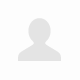
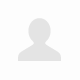

In [12]:
bs

In [13]:
a = bs.findAll('img')

imageNum = 0
imageStr = "open_eyes"

for i in range(len(a)):
    b = a[i].attrs['src']
    urlretrieve(b, imageStr + str(imageNum) + ".jpg")
    imageNum += 1
    
#     imageNum += 1
#     imgURL = "C:\jupyter_home\data\eyes"
#     urllib.request.urlretrieve(imgURL,imageStr + str(imageNum) + ".jpg")

In [ ]:
from bs4 import BeautifulSoup
import urllib.request

print('다운로드중')

url = "https://search.naver.com/search.naver?where=image&sm=tab_jum&query=%EC%97%B0%EC%98%88%EC%9D%B8+%EC%82%AC%EC%A7%84"
req = urllib.request.Request(url)
res = urllib.request.urlopen(url).read()

soup = BeatifulSoup(res, 'html.parser')
soup = soup.find("div", class_="_image _listImage")
imgUrl = soup.find("img")["src"]

urllib.request.urlretrieve(imgUrl, imageStr + str(imageNum) + ".jpg")


In [6]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from tqdm import tqdm

keyword = '연예인 사진'

print('접속중')
driver = webdriver.Chrome("C:\chromedriver.exe")
driver.implicitly_wait(30)

url = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query={}'.format(keyword)
driver.get(url)

body = driver.find_element_by_css_selector('body')
for i in range(4):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    
imgs = driver.find_elements_by_css_selector('img._image _listImage')
result = []
for img in tqdm(imgs):
    if 'http' in img.get_attribute('src'):
        result.appent(img.get_attribute('src'))
print(result)

driver.close()
print('수집완료')

import os
from urllib.request import urlretrieve

imageStr = "open_eyes"
imgURL = "C:\jupyter_home\data\eyes"

print('다운로드')
for index, link in tqdm(enumerate(result)):
    start = link.rfind('.')
    end = link.rfind('&')
    filetype = link[start:end]
    
    ulretrieve(link, './{}/{}{}{}'.format(imgURL,imageStr,index,filetype))
    time.sleep(1)
    
print('다운로드 완료')

접속중


C:\Users\yeop\AppData\Local\Temp\ipykernel_29820\1358275329.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\chromedriver.exe")
C:\Users\yeop\AppData\Local\Temp\ipykernel_29820\1358275329.py:15: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  body = driver.find_element_by_css_selector('body')
C:\Users\yeop\AppData\Local\Temp\ipykernel_29820\1358275329.py:20: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  imgs = driver.find_elements_by_css_selector('img._image _listImage')
0it [00:00, ?it/s]


[]
수집완료
다운로드


0it [00:00, ?it/s]

다운로드 완료


In [8]:
import os
from selenium import webdriver as wb
from bs4 import BeautifulSoup as bs
import time
import pandas as pd
from urllib.request import urlretrieve

if not os.path.isdir("C:\jupyter_home\data\eyes"):
    print('폴더 생성 완료')
    os.mkdir("C:\jupyter_home\data\eyes")
    
else:
    print("이미 동일한 이름의 폴더가 있습니다")


이미 동일한 이름의 폴더가 있습니다


In [7]:
import os
from selenium import webdriver as wb
from bs4 import BeautifulSoup as bs
import time
import pandas as pd
from urllib.request import urlretrieve
import urllib.request

pageNum = 1

imageNum = 0
imageStr = "open_eyes"

while pageNum <3 :
    url = "https://search.naver.com/search.naver?where=image&sm=tab_jum&query=%EC%97%B0%EC%98%88%EC%9D%B8+%EC%82%AC%EC%A7%84"

    fp = urllib.request.urlopen(url)
    source = fp.read()
    fp.close()

    soup = bs(source, 'html.parser')
    soup = soup.findAll("p",class_ = "img._image _listImage")

    for i in soup:
        imageNum += 1
        imgURL = "C:\jupyter_home\data\eyes"
        urllib.request.urlretrieve(imgURL,imageStr + str(imageNum) + ".jpg")
        print(imgURL)
        print(imageNum)
        
    pageNum+=1

In [10]:
driver = wb.Chrome()
url = "https://search.naver.com/search.naver?sm=tab_hty.top&where=image&query=%EC%97%B0%EC%98%88%EC%9D%B8%EC%82%AC%EC%A7%84&oquery=%EC%9D%B8%EB%AC%BC%EC%82%AC%EC%A7%84&tqi=hEh%2Fwsp0YiRssCn3I6GssssssFh-354444"
driver.get(url)

soup = bs(driver.page_source, 'lxml')
img = soup.select("img._listImage")
img[0]["src"]

imgSrc = []

for i in img:
    imgSrc.append(i["src"])
    
len(imgSrc)

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://chromedriver.chromium.org/home


In [ ]:
from tqdm import tqdm_notebook as tq

fileNo = 1
for i in tq(range(len(imgSrc))):
    urlretrieve(imgSrc[i], "C:\jupyter_home\data\eyes"+str("open_eyes")+str(fileNo)+".jpg")
    fileNo += 1
    time.sleep(1)